![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [2]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

DR_NO  Date Rptd  ...  Status Desc                                 LOCATION
0  220314085 2022-07-22  ...  Invest Cont  2500 S  SYCAMORE                     AV
1  222013040 2022-08-06  ...  Invest Cont  3300    SAN MARINO                   ST
2  220614831 2022-08-18  ...  Invest Cont                        1900    TRANSIENT
3  231207725 2023-02-27  ...  Invest Cont  6200    4TH                          AV
4  220213256 2022-07-14  ...  Invest Cont  1200 W  7TH                          ST

[5 rows x 12 columns]

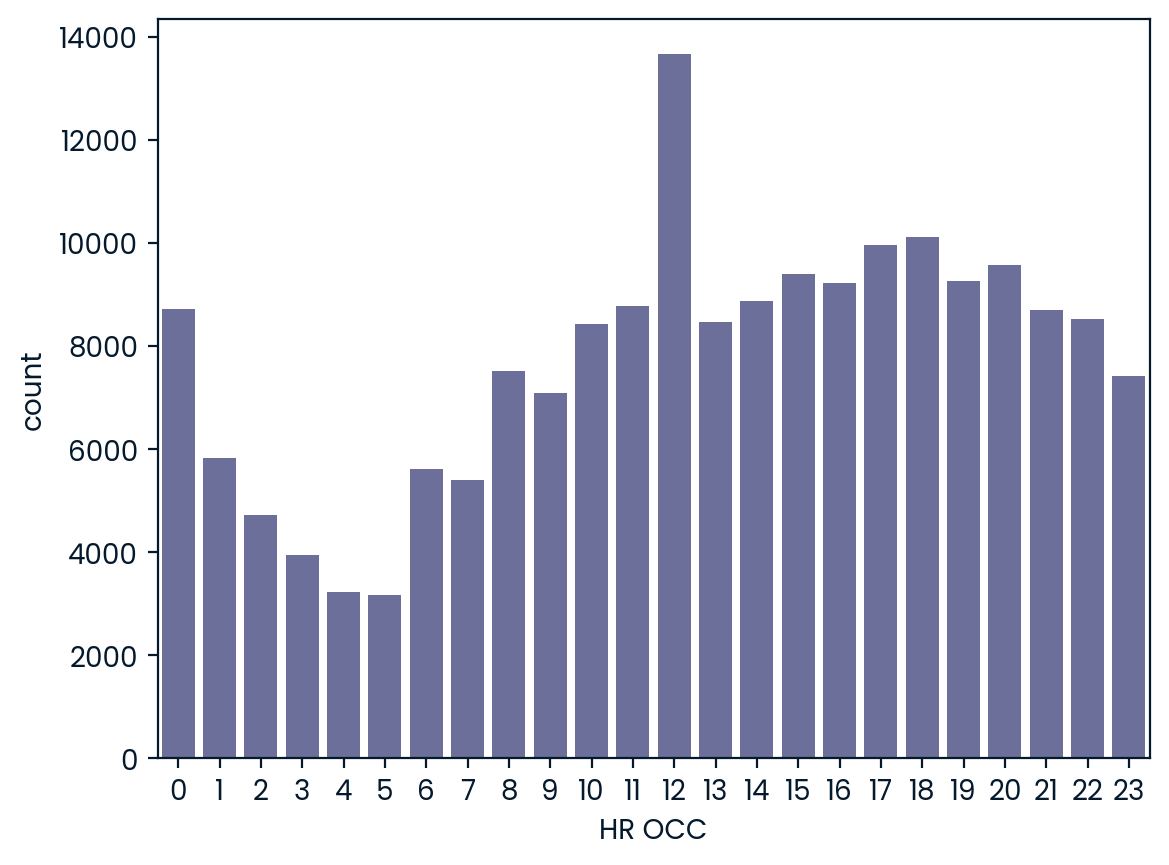

In [28]:
# Which hour has the highest frequency of crimes? 

# Extract the hours 
crimes['HR OCC'] = crimes['TIME OCC'].str[:2].astype(int)

# Plot the frequencies
sns.countplot(x = crimes['HR OCC'], data = crimes)
plt.show()

In [61]:
# Find which hour has the highest frequency using value_counts()

hr_count = crimes['HR OCC'].value_counts().to_dict() # Find value_counts for each hour and then convert into a dict
max_freq = max(hr_count.values()) # Find max freq of the value
key_list = list(hr_count.keys()) # convert all keys to a list
val_list = list(hr_count.values()) # convert all values to a list

peak_crime_hour = key_list[val_list.index(max_freq)] # find index of the max_freq and then find the value of the key in the key_list

print(f'{peak_crime_hour} has the highest frequency of crimes')

12 has the highest frequency of crimes


In [78]:
# Find which hour has the highest frequency using groupby

hr_count2 = crimes.groupby('HR OCC', as_index = False)['DR_NO'].count()
max_freq2 = max(hr_count2['DR_NO'])
peak_crime_hour2 = hr_count2[hr_count2['DR_NO'] == max_freq]['HR OCC'].values[0]
peak_crime_hour2

12

In [85]:
# Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?
night_crimes = crimes[(crimes['HR OCC'] >= 22) | (crimes['HR OCC'] < 4)]
area_night = night_crimes.groupby('AREA NAME', as_index=False)['HR OCC'].count()
large_freq = max(area_night['HR OCC'])
peak_night_crime_location = area_night[area_night['HR OCC'] == large_freq]['AREA NAME'].values[0]

print(f'{peak_night_crime_location} has the largest frequency of night crimes')


Central has the largest frequency of night crimes


In [93]:
# Another way to get the area with the largest freq of night crimes
night_time = crimes[crimes['HR OCC'].isin([22, 23, 0, 1, 2, 3])]

# Group by the area name, set_index = False then count 'HR OCC'. Next we will sort 'HR OCC' be descending order and use iloc[0] to get the row with max count of 'HR OCC' and finally get the area name of it
peak_night_crime_area = night_time.groupby('AREA NAME', as_index = False)['HR OCC'].count().sort_values('HR OCC', ascending = False).iloc[0]['AREA NAME']

print(peak_night_crime_area)

Central


In [94]:
# Identify the number of crimes committed against victims of different age groups

crimes['age_bracket'] = pd.cut(crimes['Vict Age'], bins=[0, 17, 25, 34, 44, 54, 64, np.inf], labels=["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"])
victim_ages = crimes['age_bracket'].value_counts()
print(victim_ages)
    

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: age_bracket, dtype: int64
